In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
data = pd.read_csv("input/OnlineRetail.csv", encoding="latin1")

data.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom

In [19]:
data["InvoiceDate"] = pd.to_datetime(data["InvoiceDate"])

data["invoiceyearmonth"] = data["InvoiceDate"].map(lambda date: 100*date.year + date.month)

data["revenue"] = data["UnitPrice"] * data["Quantity"]

tx_revenue = data.groupby(["invoiceyearmonth"])["revenue"].sum().reset_index()

tx_revenue

invoiceyearmonth      revenue
0             201012   748957.020
1             201101   560000.260
2             201102   498062.650
3             201103   683267.080
4             201104   493207.121
5             201105   723333.510
6             201106   691123.120
7             201107   681300.111
8             201108   682680.510
9             201109  1019687.622
10            201110  1070704.670
11            201111  1461756.250
12            201112   433668.010

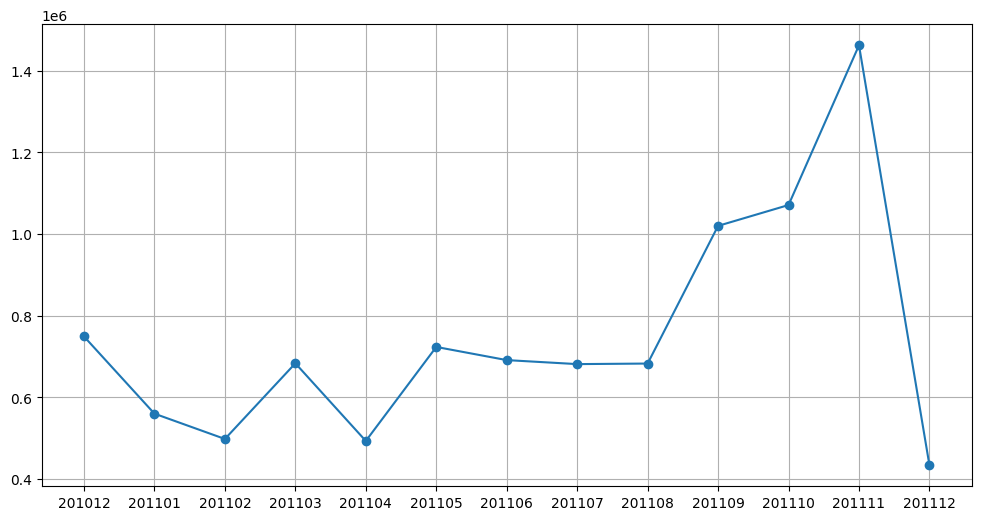

In [20]:
plt.figure(figsize=(12,6))
plt.plot(tx_revenue["invoiceyearmonth"].to_numpy(dtype=str),tx_revenue["revenue"],marker="o")

plt.grid()
plt.show()

In [21]:
tx_revenue["monthlygrowth"] = tx_revenue["revenue"].pct_change()

tx_revenue.head()

invoiceyearmonth     revenue  monthlygrowth
0            201012  748957.020            NaN
1            201101  560000.260      -0.252293
2            201102  498062.650      -0.110603
3            201103  683267.080       0.371850
4            201104  493207.121      -0.278163

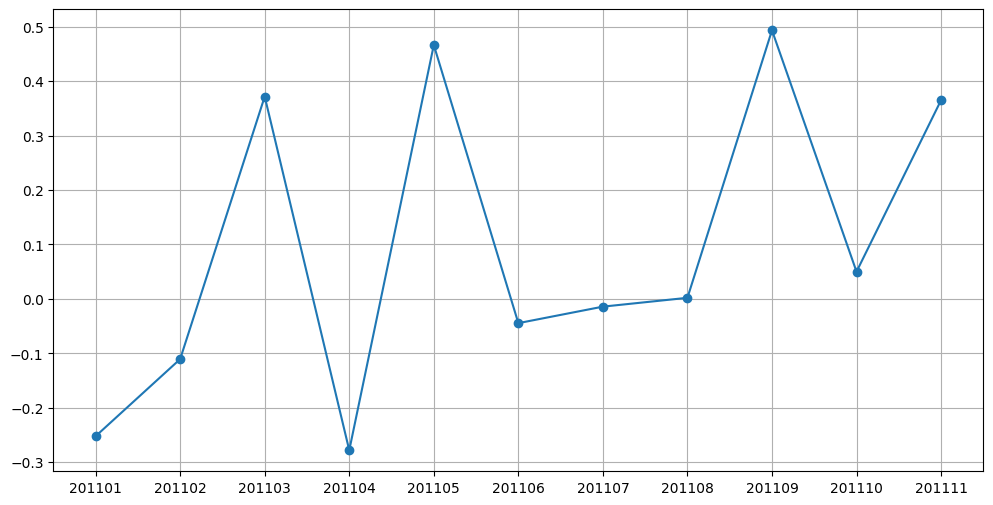

In [22]:
plt.figure(figsize=(12,6))
plt.plot(tx_revenue.query("invoiceyearmonth < 201112")["invoiceyearmonth"].to_numpy(dtype=str),
tx_revenue.query("invoiceyearmonth < 201112")["monthlygrowth"].to_numpy(),marker="o")

plt.grid()
plt.show()

In [23]:
tx_uk = data.query("Country == 'United Kingdom'").reset_index(drop=True)

tx_monthly_active = tx_uk.groupby(["invoiceyearmonth"])["CustomerID"].nunique().reset_index()

tx_monthly_active

invoiceyearmonth  CustomerID
0             201012         871
1             201101         684
2             201102         714
3             201103         923
4             201104         817
5             201105         985
6             201106         943
7             201107         899
8             201108         867
9             201109        1177
10            201110        1285
11            201111        1548
12            201112         617

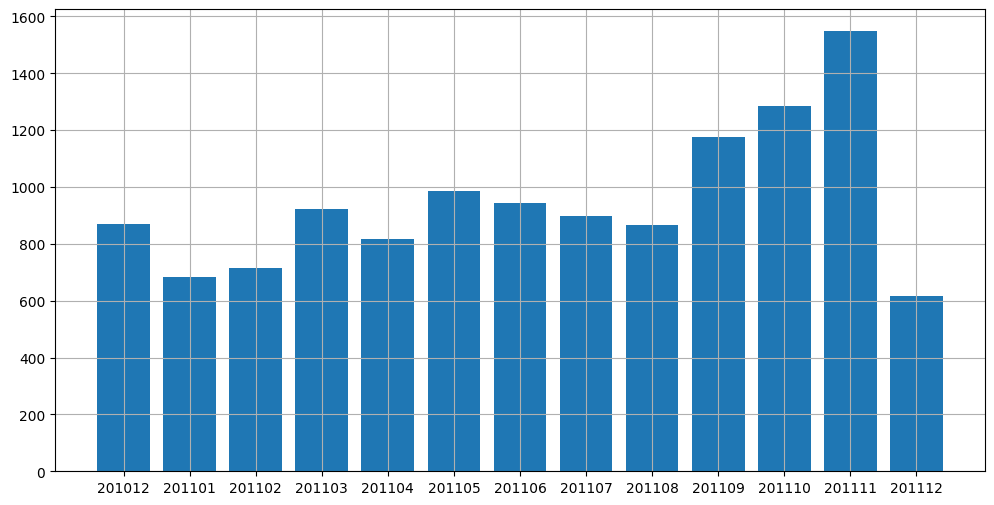

In [24]:
plt.figure(figsize=(12,6))
plt.bar(tx_monthly_active["invoiceyearmonth"].to_numpy(dtype=str), tx_monthly_active["CustomerID"].to_numpy())
plt.grid()
plt.show()

In [25]:
tx_monthly_sales = tx_uk.groupby(["invoiceyearmonth"])["Quantity"].sum().reset_index()

tx_monthly_sales

invoiceyearmonth  Quantity
0             201012    298101
1             201101    237381
2             201102    225641
3             201103    279843
4             201104    257666
5             201105    306452
6             201106    258522
7             201107    324129
8             201108    319804
9             201109    458490
10            201110    455612
11            201111    642281
12            201112    199907

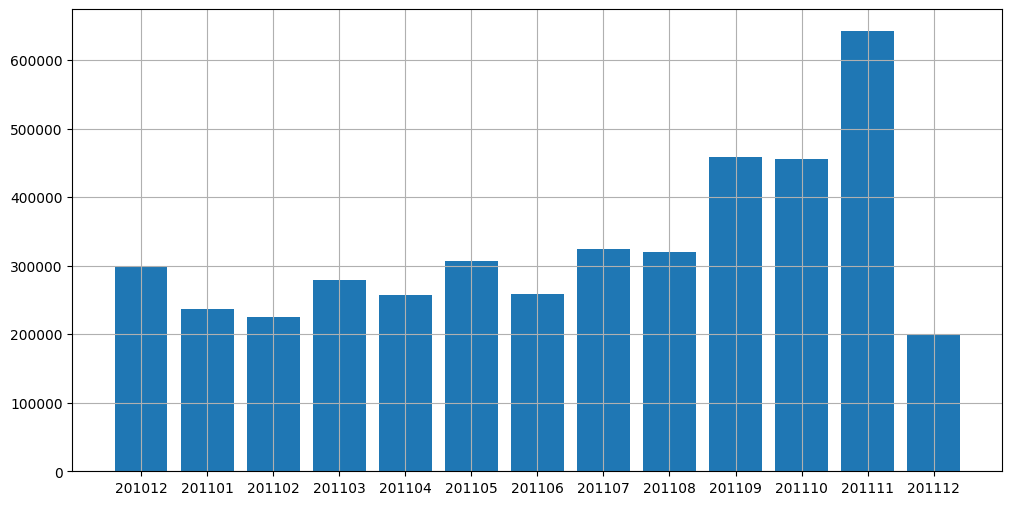

In [26]:
plt.figure(figsize=(12,6))
plt.bar(tx_monthly_sales["invoiceyearmonth"].to_numpy(dtype=str), tx_monthly_sales["Quantity"].to_numpy())
plt.grid()
plt.show()

In [27]:
tx_monthly_order_avg = tx_uk.groupby("invoiceyearmonth")["revenue"].mean().reset_index()

tx_monthly_order_avg

invoiceyearmonth    revenue
0             201012  16.865860
1             201101  13.614680
2             201102  16.093027
3             201103  16.716166
4             201104  15.773380
5             201105  17.713823
6             201106  16.714748
7             201107  15.723497
8             201108  17.315899
9             201109  18.931723
10            201110  16.093582
11            201111  16.312383
12            201112  16.247406

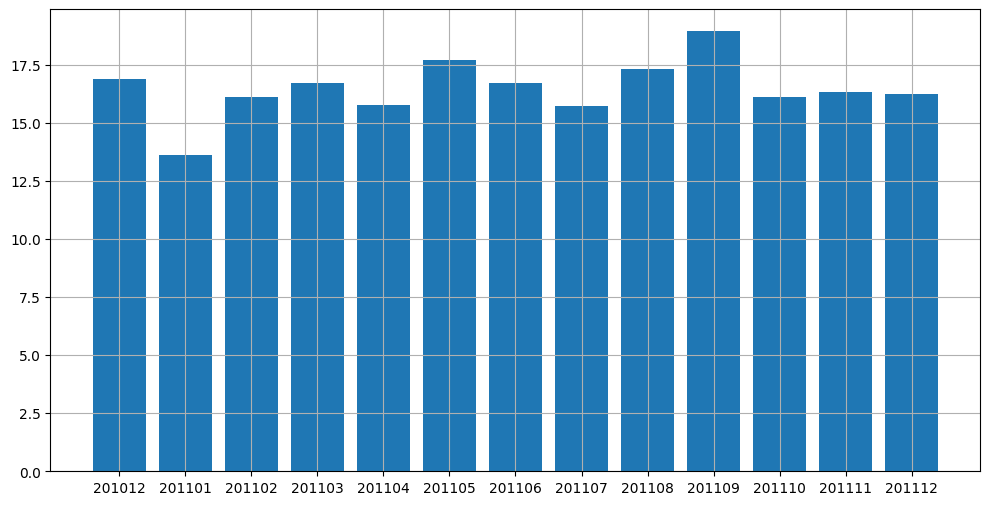

In [28]:
plt.figure(figsize=(12,6))
plt.bar(tx_monthly_order_avg["invoiceyearmonth"].to_numpy(dtype=str), tx_monthly_order_avg["revenue"].to_numpy())
plt.grid()
plt.show()

In [29]:
tx_min_purchase = tx_uk.groupby('CustomerID').InvoiceDate.min().reset_index()
tx_min_purchase.columns = ['CustomerID','MinPurchaseDate']
tx_min_purchase['MinPurchaseYearMonth'] = tx_min_purchase['MinPurchaseDate'].map(lambda date: 100*date.year + date.month)

In [30]:
tx_uk = pd.merge(tx_uk, tx_min_purchase, on='CustomerID')

tx_uk.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  \
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom   
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom   
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom   
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom   
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom   

   invoiceyearmonth  revenue     MinPurchaseDate  MinPurchaseYearMonth  
0            201012    15.30 2010-12-01 08:26:00                201012  
1            201012    20.34 2010-12-01 08:26:00                201012  
2            201012    22.00 2010-12-01 08:26:00                201012  
3            201012    20.34 2010-12-01 08:26:00                201012  
4            201012    20.34 2010-12-01 08:26:00                201012

In [32]:
tx_uk['UserType'] = 'New'
tx_uk.loc[tx_uk['invoiceyearmonth']>tx_uk['MinPurchaseYearMonth'],'UserType'] = 'Existing'

tx_user_type_revenue = tx_uk.groupby(['invoiceyearmonth','UserType'])['revenue'].sum().reset_index()

tx_user_type_revenue = tx_user_type_revenue.query("invoiceyearmonth != 201012 and invoiceyearmonth != 201112")

tx_user_type_revenue

invoiceyearmonth  UserType     revenue
1             201101  Existing  195275.510
2             201101       New  156705.770
3             201102  Existing  220994.630
4             201102       New  127859.000
5             201103  Existing  296350.030
6             201103       New  160567.840
7             201104  Existing  268226.660
8             201104       New  108517.751
9             201105  Existing  434725.860
10            201105       New   90847.490
11            201106  Existing  408030.060
12            201106       New   64479.190
13            201107  Existing  407693.610
14            201107       New   53453.991
15            201108  Existing  421388.930
16            201108       New   55619.480
17            201109  Existing  640861.901
18            201109       New  135667.941
19            201110  Existing  648837.600
20            201110       New  133940.280
21            201111  Existing  838955.910
22            201111       New  117153.750

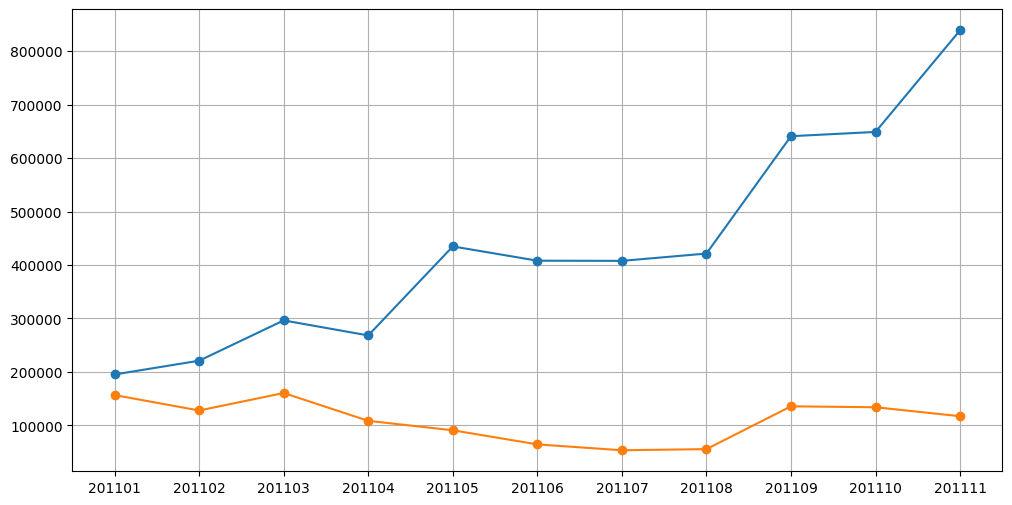

In [36]:
plt.figure(figsize=(12,6))

plt.plot(tx_user_type_revenue.query("UserType == 'Existing'")['invoiceyearmonth'].to_numpy(dtype=str), tx_user_type_revenue.query("UserType == 'Existing'")['revenue'], label='Existing', marker='o')
plt.plot(tx_user_type_revenue.query("UserType == 'New'")['invoiceyearmonth'].to_numpy(dtype=str), tx_user_type_revenue.query("UserType == 'New'")['revenue'], label = 'New', marker='o')

plt.grid()
plt.show()

In [40]:
tx_user_ratio = tx_uk.query("UserType == 'New'").groupby(['invoiceyearmonth'])['CustomerID'].nunique()/tx_uk.query("UserType == 'Existing'").groupby(['invoiceyearmonth'])['CustomerID'].nunique() 
tx_user_ratio = tx_user_ratio.reset_index()
tx_user_ratio = tx_user_ratio.dropna()

tx_user_ratio

invoiceyearmonth  CustomerID
1             201101    1.124224
2             201102    0.904000
3             201103    0.792233
4             201104    0.510166
5             201105    0.343793
6             201106    0.281250
7             201107    0.236589
8             201108    0.192572
9             201109    0.304878
10            201110    0.328852
11            201111    0.236422
12            201112    0.058319

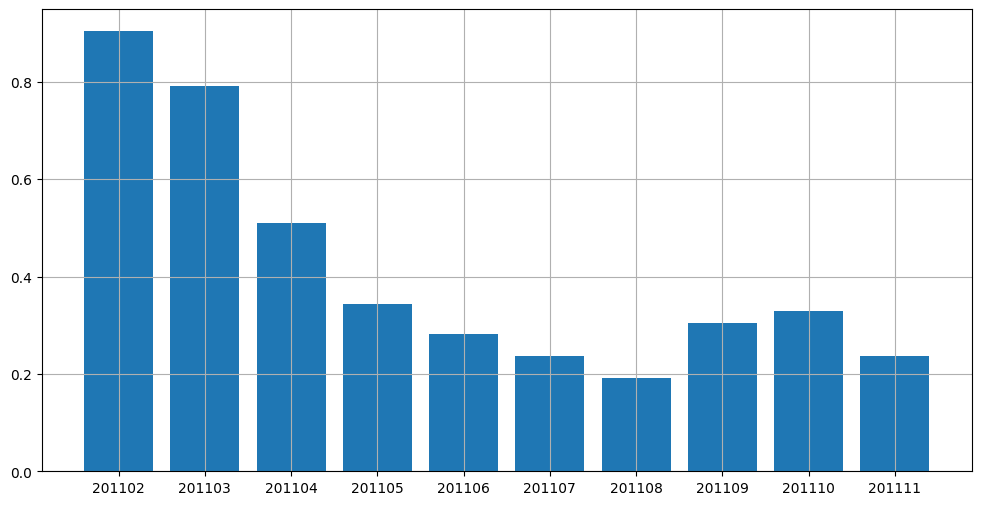

In [41]:
plt.figure(figsize = (12,6))

InvoiceYearMonth = tx_user_ratio.query("invoiceyearmonth > 201101 and invoiceyearmonth<201112")['invoiceyearmonth']
CustomerID = tx_user_ratio.query("invoiceyearmonth > 201101 and invoiceyearmonth < 201112")['CustomerID']
plt.bar(InvoiceYearMonth.to_numpy(dtype = str),CustomerID)
plt.grid()
plt.show()

In [44]:
tx_user_purchase = tx_uk.groupby(['CustomerID','invoiceyearmonth'])['revenue'].sum().reset_index()

tx_retention = pd.crosstab(tx_user_purchase['CustomerID'], tx_user_purchase['invoiceyearmonth']).reset_index()

tx_retention.tail()

invoiceyearmonth  CustomerID  201012  201101  201102  201103  201104  201105  \
3945                 18280.0       0       0       0       1       0       0   
3946                 18281.0       0       0       0       0       0       0   
3947                 18282.0       0       0       0       0       0       0   
3948                 18283.0       0       1       1       0       1       1   
3949                 18287.0       0       0       0       0       0       1   

invoiceyearmonth  201106  201107  201108  201109  201110  201111  201112  
3945                   0       0       0       0       0       0       0  
3946                   1       0       0       0       0       0       0  
3947                   0       0       1       0       0       0       1  
3948                   1       1       0       1       1       1       1  
3949                   0       0       0       0       1       0       0

In [45]:
months = tx_retention.columns[2:]
tx_retention_array = []
for i in range(len(months)-1):
    tx_retention_data = {}
    selected_month = months[i+1]
    prev_month = months[i]
    tx_retention_data['invoiceyearmonth'] = int(selected_month)
    tx_retention_data['TotalUserCount'] = tx_retention[selected_month].sum()
    tx_retention_data['RetainedUserCount'] = tx_retention[(tx_retention[selected_month]>0) & (tx_retention[prev_month]>0)][selected_month].sum()
    tx_retention_array.append(tx_retention_data)

tx_retention = pd.DataFrame(tx_retention_array)
tx_retention['RetentionRate'] = tx_retention['RetainedUserCount']/tx_retention['TotalUserCount']

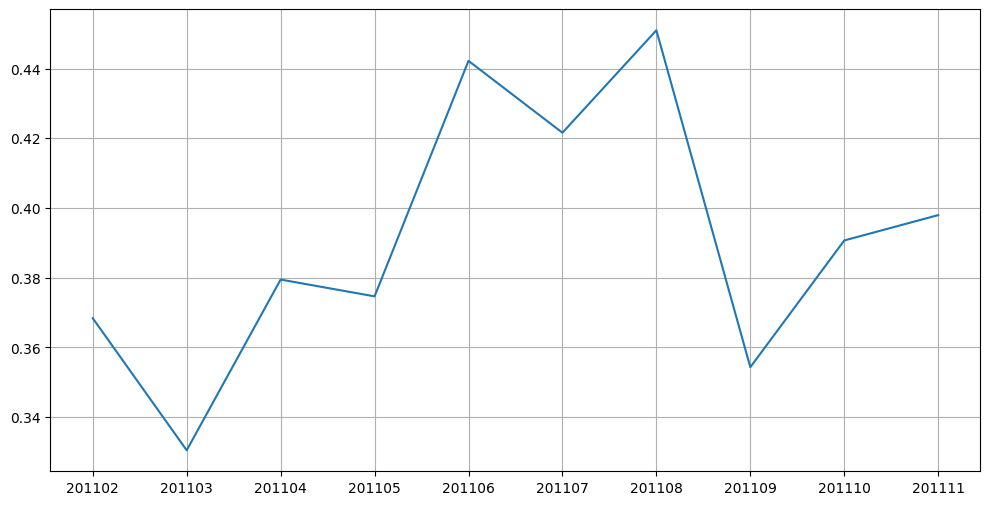

In [46]:
plt.figure(figsize=(12,6))
plt.plot(tx_retention.query("invoiceyearmonth < 201112")['invoiceyearmonth'].to_numpy(dtype=str),tx_retention.query("invoiceyearmonth<201112")['RetentionRate'].to_numpy())
        
plt.grid()
plt.show()